# Exploratory Data Analysis (EDA)

Conduct EDA on the realtor-data data to examine relationships between variables and other patterns in the data.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
realtor_data = pd.read_csv('realtor-data.csv')

In [3]:
realtor_data.shape

(1401066, 10)

In [4]:
#Call the info method on realtor-data to see a summary of the data
realtor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


# Cleanup

In [5]:
missing = pd.concat([realtor_data.isnull().sum(), 100 * realtor_data.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='%')

,count,%
status,0,0.000000
state,0,0.000000
price,108,0.007708
city,191,0.013632
zip_code,479,0.034188
bath,194213,13.861802
bed,216528,15.454518
acre_lot,357467,25.513930
house_size,450112,32.126395
prev_sold_date,686293,48.983631


In [6]:
# drop rows with missing value in the city,price and zip_colde columns

realtor_data2_drop=realtor_data
realtor_data2_drop.dropna(subset =['zip_code','price','city'],inplace=True)
missing = pd.concat([realtor_data2_drop.isnull().sum(), 100 * realtor_data2_drop.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='%')

,count,%
status,0,0.000000
city,0,0.000000
state,0,0.000000
zip_code,0,0.000000
price,0,0.000000
bath,193804,13.838932
bed,216158,15.435160
acre_lot,357319,25.515022
house_size,449764,32.116227
prev_sold_date,685717,48.964886


In [7]:
realtor_data2_drop.shape

(1400426, 10)

In [8]:
# Check data types of columns
for column in realtor_data2_drop.columns[realtor_data2_drop.isnull().sum() > 0]:
    if realtor_data2_drop[column].dtype != 'object':  # Check if column is numeric
        mean_val = realtor_data2_drop[column].mean()
        realtor_data2_drop[column].fillna(mean_val, inplace=True)

In [9]:
missing = pd.concat([realtor_data2_drop.isnull().sum(), 100 * realtor_data2_drop.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='%')

,count,%
status,0,0.000000
bed,0,0.000000
bath,0,0.000000
acre_lot,0,0.000000
city,0,0.000000
state,0,0.000000
zip_code,0,0.000000
house_size,0,0.000000
price,0,0.000000
prev_sold_date,685717,48.964886


In [11]:
# fill missing value with mean
  
for column in realtor_data2_drop.columns[realtor_data2_drop.isnull().sum() > 0]:
    if realtor_data2_drop[column].dtype != 'object':  # Check if column is numeric
        mean_val = realtor_data2_drop[column].mean()
        realtor_data2_drop[column].fillna(mean_val, inplace=True)

In [12]:
realtor_data2_drop.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,1.400426e+06,1.400426e+06,1.400426e+06,1.400426e+06,1.400426e+06,1.400426e+06
mean,3.392358e+00,2.487507e+00,3.215683e+01,8.356178e+03,2.178736e+03,8.187839e+05
std,1.887030e+00,1.739209e+00,1.079048e+03,4.128268e+03,2.877929e+03,2.683550e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,6.010000e+02,4.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,1.700000e-01,5.652000e+03,1.404000e+03,2.350000e+05
50%,3.000000e+00,2.000000e+00,8.400000e-01,8.757000e+03,2.178736e+03,4.470000e+05
75%,4.000000e+00,3.000000e+00,3.215683e+01,1.142600e+04,2.178736e+03,7.950000e+05
max,1.230000e+02,1.980000e+02,1.000000e+05,9.999900e+04,1.450112e+06,8.750000e+08


In [13]:
realtor_data2_drop.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [14]:
realtor_data2_drop.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2178.735694,NaN,65000.0


# Display the distribution of data

Text(0.5, 0, 'Bedroom count')

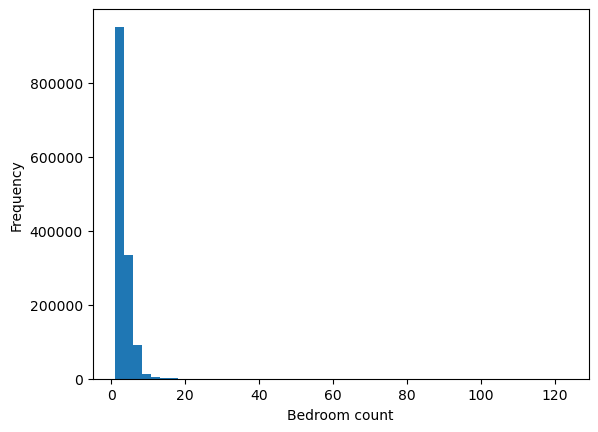

In [15]:
#Plot values for realtor_data2_drop column
ax = realtor_data2_drop.bed.plot(kind='hist', bins=50)
ax.set_xlabel("Bedroom count")

Text(0.5, 0, 'Bathroom count')

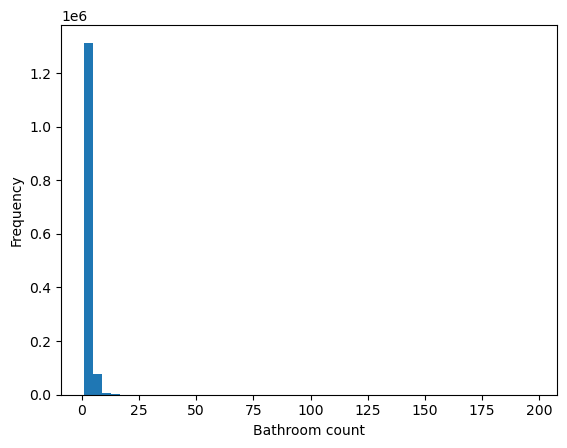

In [16]:
ax = realtor_data2_drop.bath.plot(kind='hist', bins=50)
ax.set_xlabel("Bathroom count")

Text(0.5, 0, 'Property/Land size in acres')

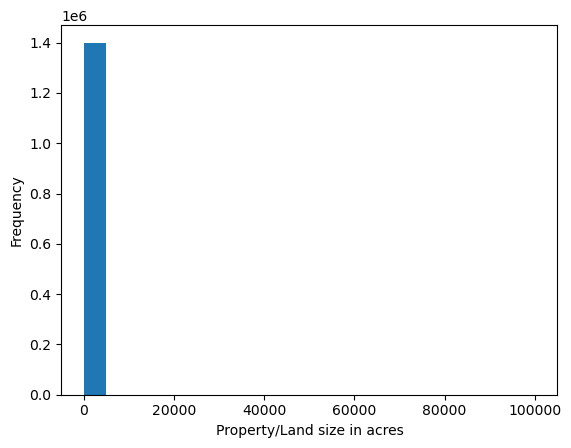

In [17]:
ax = realtor_data2_drop.acre_lot.plot(kind='hist', bins=20)
ax.set_xlabel("Property/Land size in acres")

Text(0.5, 0, 'House size')

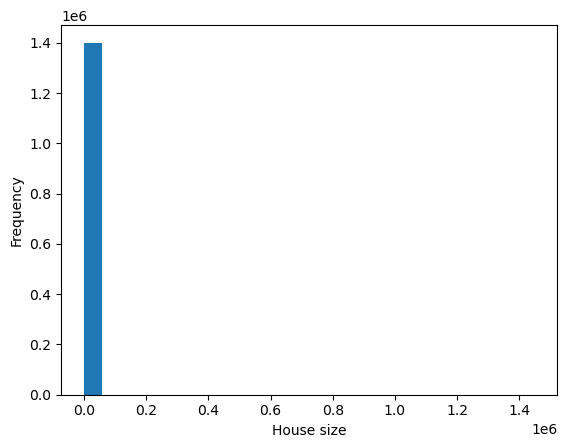

In [18]:
ax = realtor_data2_drop.house_size.plot(kind='hist', bins=25)
ax.set_xlabel("House size")

Text(0.5, 0, 'House price')

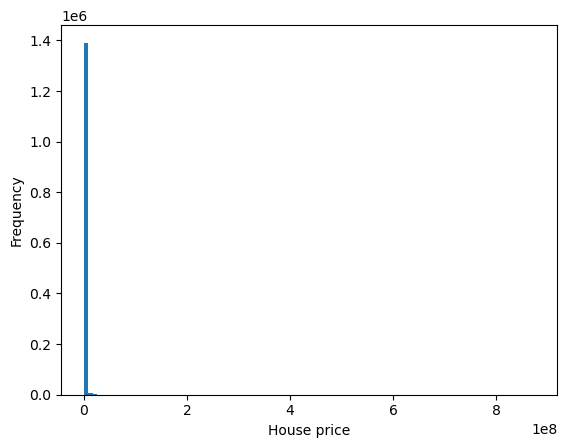

In [19]:
ax = realtor_data2_drop.price.plot(kind='hist', bins=100)
ax.set_xlabel("House price")

# Visualize Relationships between Variables

C:\Users\myliu\AppData\Local\Temp\ipykernel_19320\2513390005.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = realtor_data2_drop.corr()


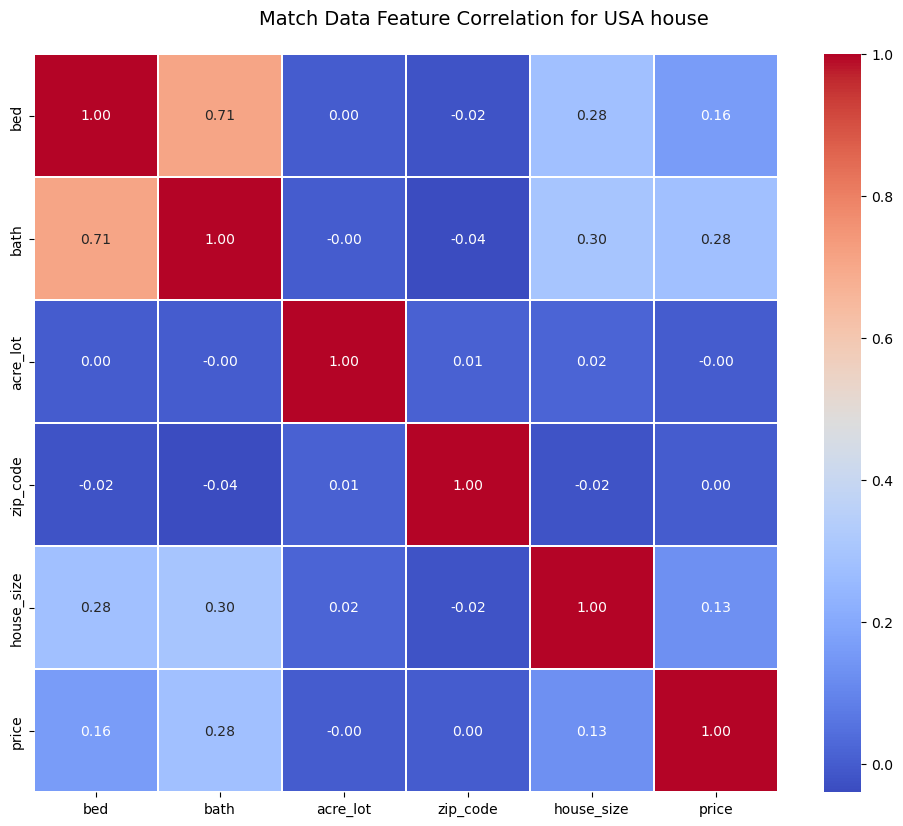

In [20]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features
corrmat = realtor_data2_drop.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Match Data Feature Correlation for USA house', fontsize=14)

From the graph, we can see that the number of bathrooms in a house has a strong correlation with the number of bedroom, the correlations between other variables are relatively weak.The house price has a weak positive correlation with the number of bedrooms and bathrooms and the house area.

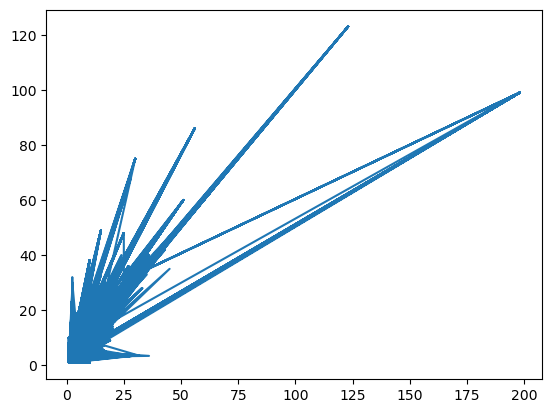

In [21]:
#Create a pairplot for all numeric variables
x=realtor_data2_drop.bath
y=realtor_data2_drop.bed
plt.plot(x,y)
plt.show()